In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
plt.style.use('ggplot')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
skill_df = pd.read_csv('skills_full_csv.csv',header=[0,1],index_col=0)
course_df = pd.read_excel('../data/CSE_Courses_BD.xlsx',sheet_name = 0)
map_df = pd.read_excel('../data/CSE_Courses_BD.xlsx',sheet_name = 1)

In [3]:
skill_df = skill_df.xs('Percentage',level=1,axis=1)

In [4]:
map_df = map_df.melt(id_vars=['Skills']).dropna().drop(['variable'],axis=1)

In [5]:
map_df = map_df.rename(columns={'value':'Course'})

In [6]:
map_df.index = map_df['Skills']

In [7]:
map_df = map_df.drop(['HTML5','CSS3','JS','Excel','Word','PowerPoint'])

In [8]:
skill_df[skill_df.index.isin(map_df.index)]

,2016,2017,2018,2019,2020,2021
Database,21.077844,20.554100,19.318996,21.868583,25.185833,25.100216
Networking,21.197605,18.906776,16.451613,18.446270,17.271535,18.994758
QA,12.495010,14.114564,11.003584,12.491444,14.954088,17.144619
JAVA,8.023952,6.252340,6.702509,6.125941,6.777438,6.506321
PHP,21.836327,20.029951,16.415771,16.187543,17.184084,13.660191
JavaScript,22.994012,22.575814,19.139785,21.081451,23.830345,20.906568
API,11.976048,14.189442,14.802867,19.472964,25.054657,26.672834
SQL,9.620758,8.873081,8.960573,9.103354,7.826847,9.312365
jQuery,18.203593,16.697866,12.114695,12.731006,13.511150,10.576627
WordPress,9.820359,7.675028,7.275986,5.783710,8.439003,6.506321


In [9]:
map_df.Course.values

array(['Database', 'Database', 'OOP', 'Database', 'Database',
       'Structured Programming', 'OOP', 'OS',
       'Software Development Project', 'OOP',
       'Software Development Project', 'Database', 'Software Engineering',
       'Computer Graphics', 'Computer Graphics', 'Machine Learning',
       'Software Development Project', 'Software Engineering',
       'Computer Networks', 'Software Engineering',
       'Software Development Project', 'Computer Networks',
       'Technical Writing and Presentations', 'Software Engineering',
       'Software Development Project', 'Software Development Project',
       'Software Development Project', 'Software Development Project',
       'Software Development Project', 'Software Development Project',
       'Software Development Project', 'Software Development Project',
       'Software Development Project', 'Software Development Project',
       'Software Development Project', 'Software Development Project',
       'Software Development Pr

In [10]:
course_importance = pd.DataFrame(index = set(map_df.Course.values), columns = skill_df.columns).fillna(0)
course_count = pd.DataFrame(index = set(map_df.Course.values), columns = skill_df.columns).fillna(0)


In [11]:
skill_course_count = map_df['Course'].value_counts()

In [45]:
course_importance.index = course_importance['index']

In [40]:
skill_count_df = pd.DataFrame(skill_course_count).reset_index()
skill_count_df['Year'] = 2021
skill_count_df

,index,Course,Year
0,Software Development Project,28,2021
1,Database,5,2021
2,OOP,4,2021
3,Software Engineering,4,2021
4,Computer Graphics,2,2021
5,Computer Networks,2,2021
6,Technical Writing and Presentations,1,2021
7,Machine Learning,1,2021
8,Structured Programming,1,2021
9,OS,1,2021


In [48]:
course_importance.loc[skill_course_count.index[index]].values[1]

11.296859169199594

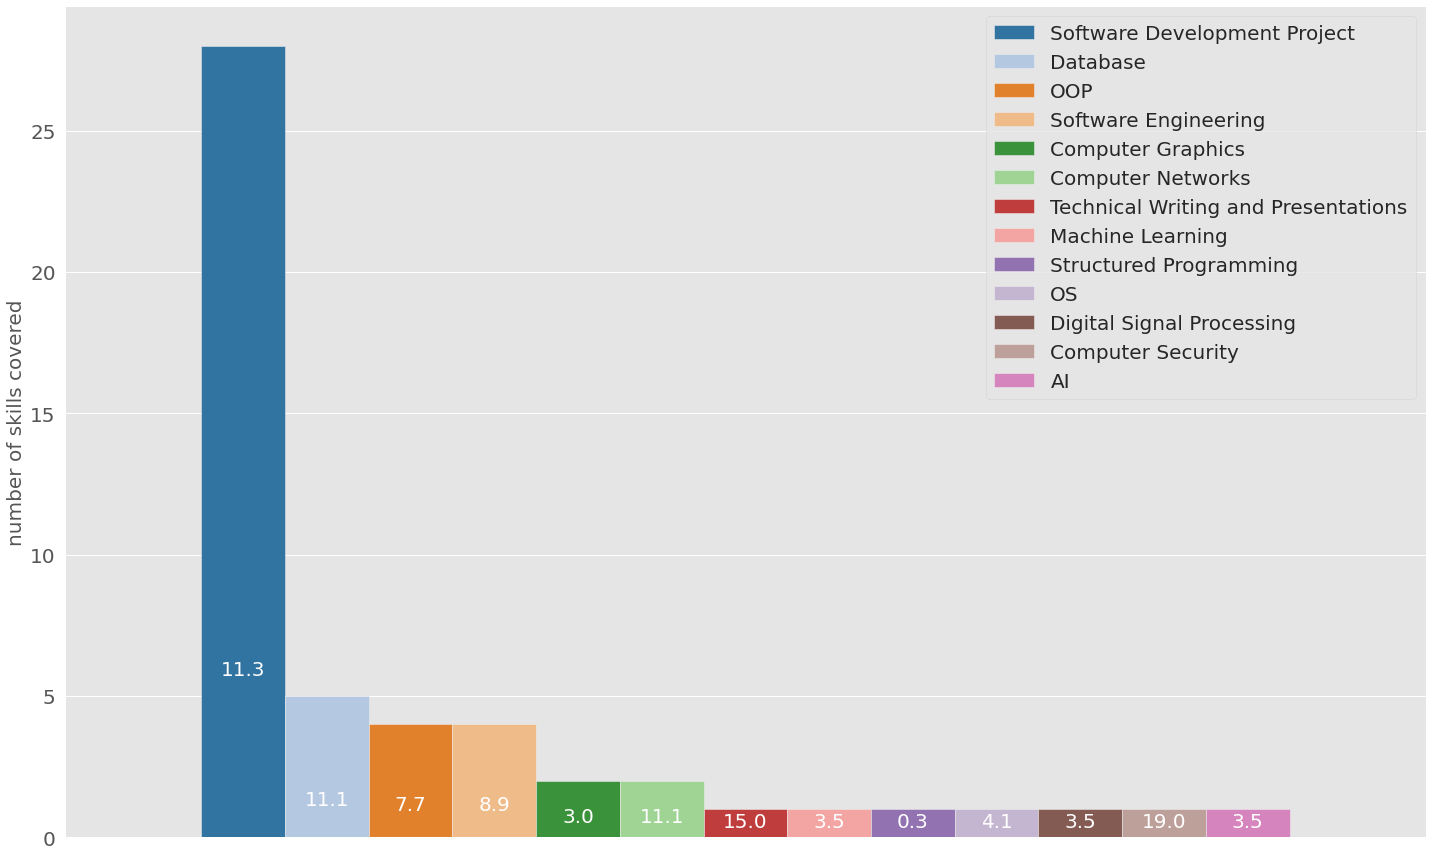

In [64]:
plt.rcParams['figure.figsize'] = (20,12)

fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x='Year',y='Course',hue='index',data=skill_count_df.sort_values('Course',ascending=False),ax=ax,palette='tab20')

# for index in range(len(course_importance)):
#     plt.text(x=index/1000 , y =skill_course_count.iloc[index] +0.1 , s="%2.1f" %course_importance.loc[skill_course_count.index[index]].values[1] , fontdict=dict(fontsize=14))
plt.xticks([])
plt.xlabel(None)
plt.yticks(fontsize=20)
plt.ylabel('number of skills covered',fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
"%2.1f" %course_importance.loc[skill_course_count.index[index]].values[1] 
plt.xticks()
for index,rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 0.2 * height,
            s = "%2.1f" %course_importance.loc[skill_course_count.index[index]].values[1] ,
            ha='center', va='bottom', rotation=0, color='white',fontsize=20)
plt.savefig('../G12.png')    

In [129]:
course_importance

,2016,2017,2018,2019,2020,2021
OOP,0,0,0,0,0,0
AI,0,0,0,0,0,0
Software Engineering,0,0,0,0,0,0
Digital Signal Processing,0,0,0,0,0,0
Structured Programming,0,0,0,0,0,0
Computer Networks,0,0,0,0,0,0
OS,0,0,0,0,0,0
Software Development Project,0,0,0,0,0,0
Machine Learning,0,0,0,0,0,0
Computer Graphics,0,0,0,0,0,0


NameError: name 'menMeans' is not defined

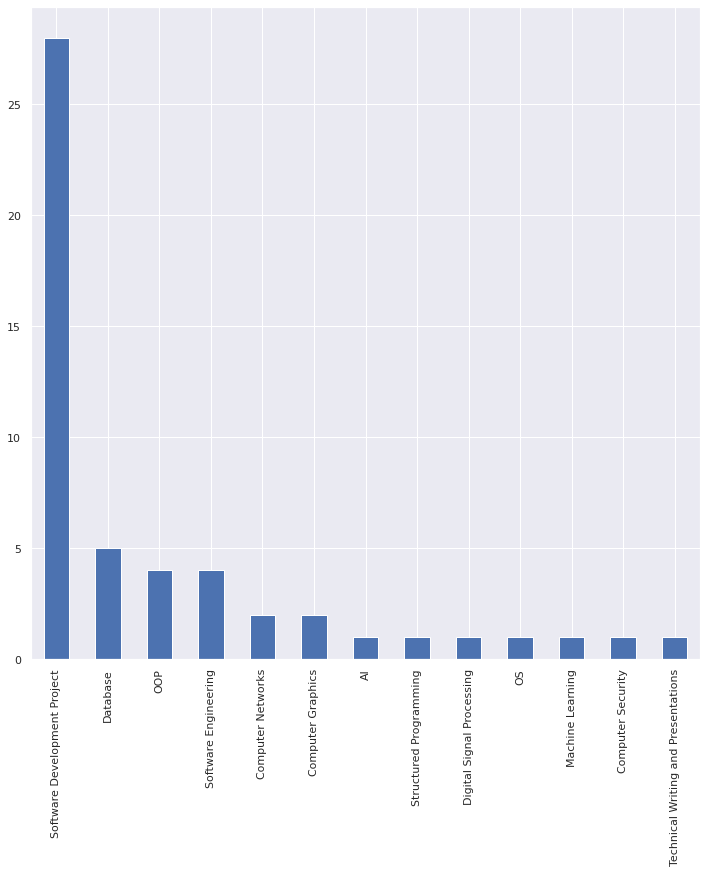

In [130]:
skill_course_count.plot(kind='bar')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))

In [131]:
map_df

,Skills,Course
Skills,,
Database,Database,Database
SQL,SQL,Database
Android,Android,OOP
Oracle,Oracle,Database
MySQL,MySQL,Database
C,C,Structured Programming
JAVA,JAVA,OOP
Linux,Linux,OS
iOS,iOS,Software Development Project


In [12]:
for skill,course in zip(map_df.index,map_df.Course):
    print(skill,course)
    course_importance.loc[course,:] += skill_df.loc[skill,:]
    course_count.loc[course,:] += 1    

Database Database
SQL Database
Android OOP
Oracle Database
MySQL Database
C Structured Programming
JAVA OOP
Linux OS
iOS Software Development Project
OOP OOP
ASP.NET Software Development Project
SQL Server Database
QA Software Engineering
Photoshop Computer Graphics
Illustrator Computer Graphics
Python Machine Learning
C# Software Development Project
ERP Software Engineering
aws Computer Networks
MVC Software Engineering
API Software Development Project
Networking Computer Networks
Documentation Technical Writing and Presentations
Design Pattern Software Engineering
PHP Software Development Project
Database Software Development Project
SQL Software Development Project
JavaScript Software Development Project
SEO Software Development Project
Android Software Development Project
CSS Software Development Project
Oracle Software Development Project
HTML Software Development Project
MySQL Software Development Project
WordPress Software Development Project
Laravel Software Development Project

In [13]:
course_importance

,2016,2017,2018,2019,2020,2021
Technical Writing and Presentations,12.774451,12.654437,12.114695,12.867899,13.205072,14.986124
OOP,32.455090,29.764133,26.308244,28.336756,30.738959,30.958989
Machine Learning,1.676647,1.871958,1.863799,2.840520,2.623524,3.453592
Software Engineering,31.936128,33.695245,25.483871,30.937714,32.706603,35.615171
Structured Programming,1.277445,1.198053,1.003584,0.821355,0.437254,0.308356
Computer Graphics,10.299401,9.996256,9.784946,10.506502,8.264101,6.012951
Computer Networks,22.075848,19.955073,18.028674,20.260096,20.157411,22.232501
OS,4.870259,5.540996,3.942652,4.004107,4.766069,4.070305
Digital Signal Processing,1.676647,1.871958,1.863799,2.840520,2.623524,3.453592
Computer Security,21.197605,18.906776,16.451613,18.446270,17.271535,18.994758


In [14]:
course_importance = course_importance / course_count

In [15]:
course_importance = course_importance.loc[:,['2021']]

In [16]:
melted = course_importance.melt(var_name='Year',value_name='Weight',ignore_index=False)
# melted = melted.reset_index()

In [17]:
melted = melted.groupby('Year')['Weight'].nlargest(5)

In [18]:
melted = melted.reset_index()

In [24]:
course_importance = course_importance.reset_index()
course_importance['Year'] = 2021
course_importance

,index,2021,Year
0,Technical Writing and Presentations,14.986124,2021
1,OOP,7.739747,2021
2,Machine Learning,3.453592,2021
3,Software Engineering,8.903793,2021
4,Structured Programming,0.308356,2021
5,Computer Graphics,3.006475,2021
6,Computer Networks,11.116250,2021
7,OS,4.070305,2021
8,Digital Signal Processing,3.453592,2021
9,Computer Security,18.994758,2021


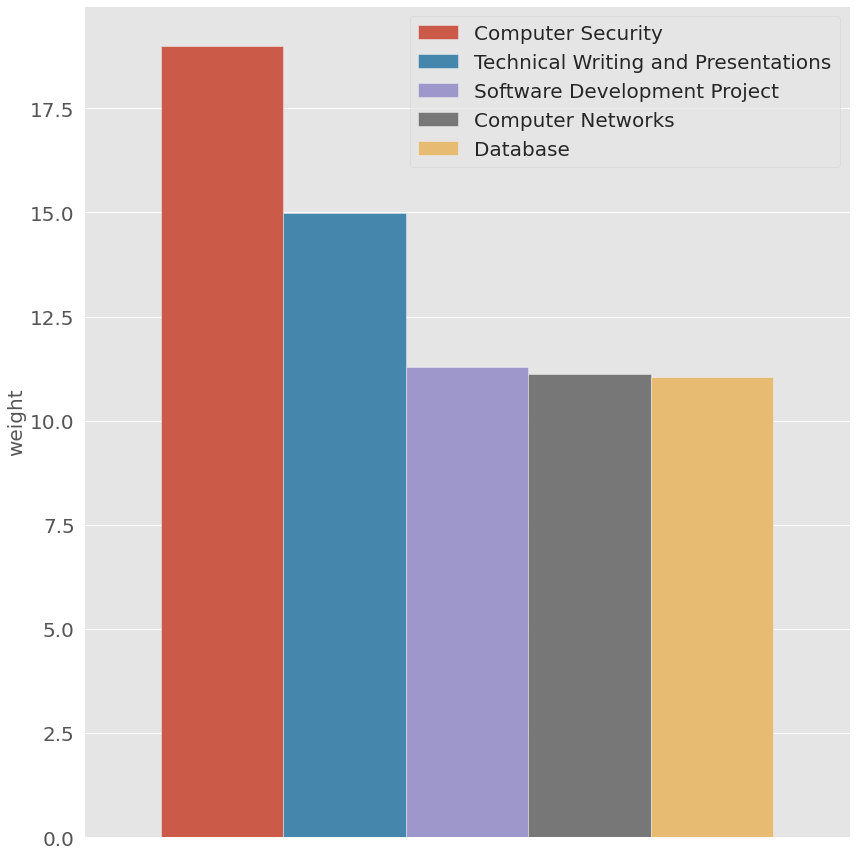

In [34]:
# melted = melted.rename({'level_1':'Course'},axis=1)
plt.style.use('ggplot')

# course_importance.sort_values('2021',ascending=False)[:5].plot(kind='bar',color='b')
sns.barplot(x='Year',y='2021',hue='index',data=course_importance.sort_values('2021',ascending=False)[:5])
plt.xticks([])
plt.xlabel(None)
plt.yticks(fontsize=20)
plt.ylabel('weight',fontsize=20)
plt.legend(fontsize=20)

plt.tight_layout()
plt.savefig('../G11.png')

In [36]:
plt.style.use('ggplot')
sns.barplot(y='2021',hue='Course', data=course_importance,palette='tab10')
# plt.savefig('../G11.png')

ValueError: Could not interpret input 'Course'

In [ ]:
imp_series = melted.groupby(['Course Name'])['Weight'].mean()

In [ ]:
course_df = course_df.iloc[:,:6]
course_df

In [ ]:
required_course = set(map_df['Course'])

In [ ]:
required_course

In [ ]:
institute_df = pd.DataFrame(index=course_df.columns,columns=skill_df.columns).fillna(0)

In [ ]:
course_df

In [ ]:
course_df.index = course_df['Course Name']

In [ ]:
course_df = course_df.drop(['Course Name'],axis=1)

In [ ]:
course_df[course_df != 0] = 1

In [ ]:
for i in range(len(course_df)):
    course_df.iloc[i,:] = course_df.iloc[i,:] * imp_series[course_df.index[i]]

In [ ]:
course_df.loc[list(required_course),:].sum(axis=0).sort_values(ascending=False)

In [ ]:
(course_df.loc[list(required_course),:].sum(axis=0)/len(required_course) *100).sort_values(ascending=False).plot.bar()
# (course_df.loc[list(required_course),:].sum(axis=0)).sort_values(ascending=False).plot.bar()
plt.title('Percentage of Required Courses Covered by University')

plt.savefig('../G2.png')

In [ ]:
temp = course_df.loc[list(required_course),:]
# for col in institute_df.columns:
#     institute_df

In [ ]:
course_df

In [ ]:
not_utilized = course_df.copy()

In [ ]:
not_utilized[:] = 0

In [ ]:
not_utilized.loc[list(required_course),:] = 1

In [ ]:
(not_utilized == 0).sum()

In [ ]:
not_utilized.sum(axis=0)

In [ ]:
(not_utilized.loc[list(required_course),:].sum(axis=0) / not_utilized.sum(axis=0) * 100).sort_values(ascending=False).plot.bar()
plt.title('Percentage of Course Not Required in Industry')
plt.savefig('../G3.png')